# FaceWord EEG analysis

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
raw = mne.io.read_raw_brainvision('group5.vhdr',preload=True,eog=("VEOG","HEOG"))

Extracting parameters from group5.vhdr...
Setting channel info structure...
Reading 0 ... 1226739  =      0.000 ...  1226.739 secs...


In [4]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)
raw.set_eeg_reference('average', projection=False, verbose=False)

<RawBrainVision | group5.eeg, 32 x 1226740 (1226.7 s), ~299.5 MB, data loaded>

## Bad channels

Using matplotlib as 2D backend.


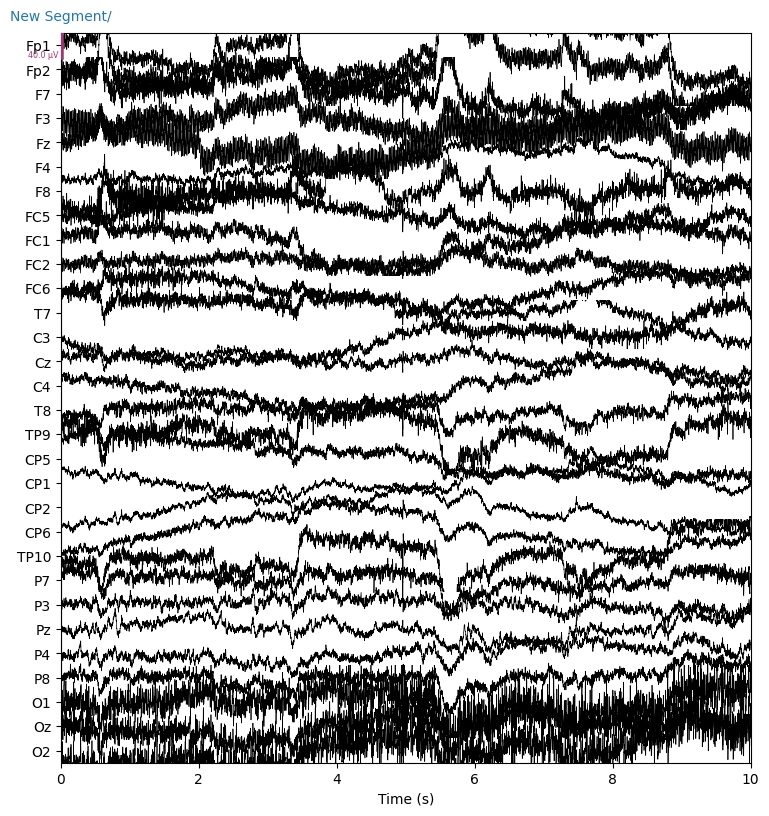

In [5]:
raw.plot(n_channels=30,show_scrollbars=False,duration=10);

It's particularly hard to glean bad channels from such noisy data. Filtering may be required.

## Filtering

In [6]:
raw.filter(l_freq=0.1,h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 sec)



<RawBrainVision | group5.eeg, 32 x 1226740 (1226.7 s), ~299.5 MB, data loaded>

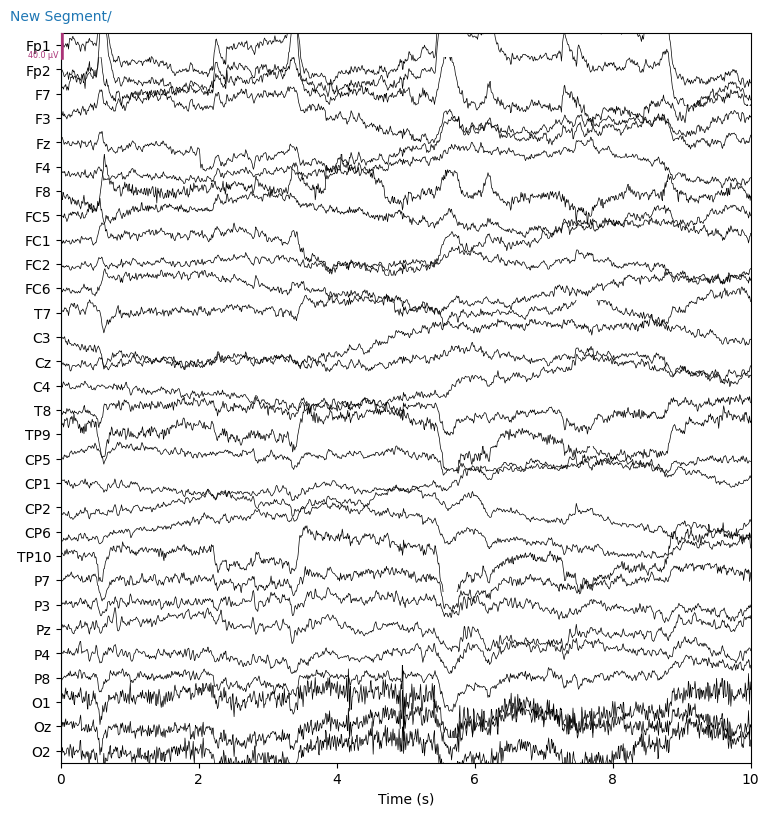

In [7]:
raw.plot(n_channels=30,show_scrollbars=False,duration=10);

Noise nonetheless seems highly prevalent.

## Epoching

In [8]:
event_id = {'Word/wPos': 11, # positive word
'Wait/wPos': 31, # waiting time after positive word
'Image/wPos': 21, # positive image (always following pos word)
'Word/wNeg': 12, # negative word
'Wait/wNeg': 32, # waiting time after negative word
'Image/wNeg': 22, # negative image (always following neg word)
'Word/wNeu': 13, # neutral word
'Wait/wNeu/iPos': 51, # wait time after neu w (before pos i)
'Image/wNeu/iPos': 41, # positive image (after neu word)
'Wait/wNeu/iNeg': 52, # wait time after neu w (before neg i)
'Image/wNeu/iNeg': 42, # negative image (after neu word)
'Correct/wPos': 101, # correct response ('b') to pos w + image
'Correct/wNeg': 102, # correct response ('y') to neg w + image
'Correct/wNeu/iPos': 111, # cor resp ('b') to neu w + pos image
'Correct/wNeu/iNeg': 112, # cor resp ('y') to neu w + neg image
#'Incorrect/wPos': 202, # incor resp ('y') to pos w + image. Not present in the data
'Incorrect/wNeg': 201, # incor resp ('b') to neg w + image
'Incorrect/wNeu/iPos': 212, # incor resp ('y') to neu w + pos i
'Incorrect/Neu/iNeg': 211 # incor resp ('b') to neu w + neg i
}

In [9]:
events, _ = mne.events_from_annotations(raw)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S201', 'Stimulus/S211', 'Stimulus/S212']


C:\Users\dolse\AppData\Local\Temp\ipykernel_9324\3623631828.py:1: RuntimeWarning: event 99999 missing from event_id will be ignored
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp,event_id=event_id);
C:\Users\dolse\AppData\Local\Temp\ipykernel_9324\3623631828.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp,event_id=event_id);


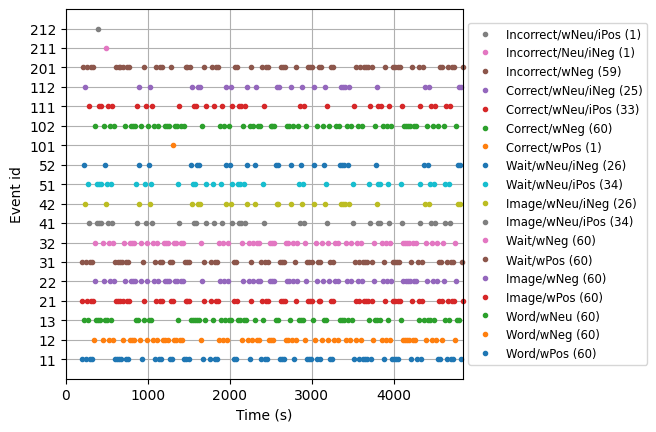

In [10]:
mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp,event_id=event_id);

In [11]:
epochs = mne.Epochs(raw,
           events,
           event_id,
           tmin=-0.1,
           tmax=0.7,
           reject={'eeg': 125e-6},
           preload=True)

epochs.drop_bad();

Not setting metadata
720 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 720 events and 801 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['TP10']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  

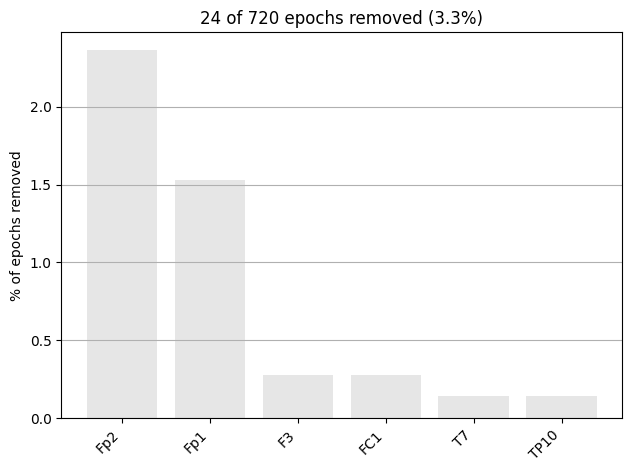

In [12]:
epochs.plot_drop_log();

In [13]:
epochs.resample(250)

Number of events,696
Events,Correct/wNeg: 58Correct/wNeu/iNeg: 23Correct/wNeu/iPos: 32Correct/wPos: 1Image/wNeg: 60Image/wNeu/iNeg: 25Image/wNeu/iPos: 34Image/wPos: 60Incorrect/Neu/iNeg: 0Incorrect/wNeg: 56Incorrect/wNeu/iPos: 1Wait/wNeg: 58Wait/wNeu/iNeg: 24Wait/wNeu/iPos: 32Wait/wPos: 60Word/wNeg: 59Word/wNeu: 56Word/wPos: 57
Time range,-0.100 – 0.696 sec
Baseline,-0.100 – 0.000 sec


# Consistency

In [14]:
event_list = event_id.keys()
r_word = re.compile("Word")
r_image = re.compile("Image")
r_i_wNeu = re.compile("Image/wNeu")

word_list = [s for s in event_list if r_word.match(s)]
image_list = [s for s in event_list if r_image.match(s)]
image_wNeu_list = [s for s in event_list if r_i_wNeu.match(s)]

Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated


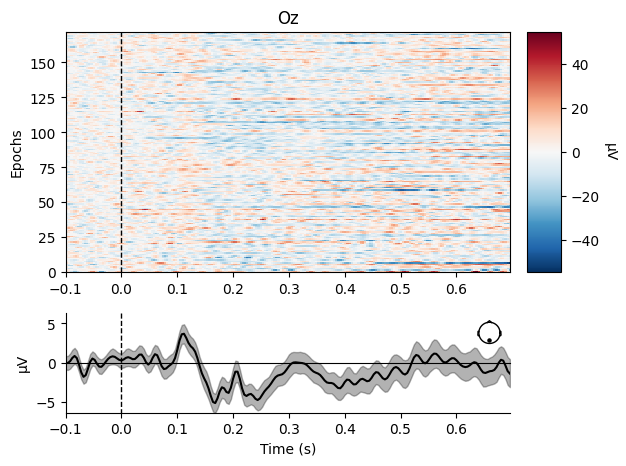

Not setting metadata
179 matching events found
No baseline correction applied
0 projection items activated


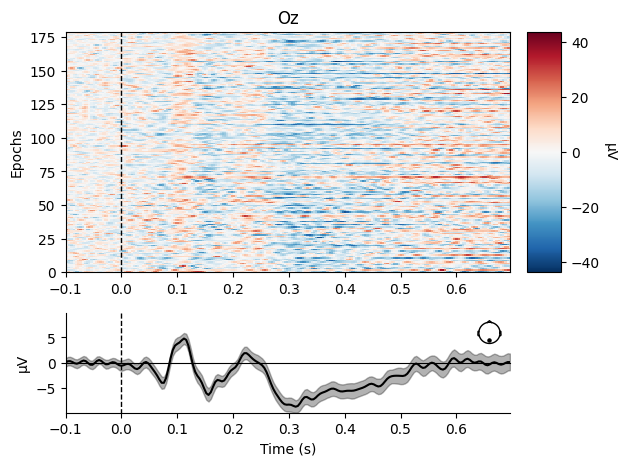

In [49]:
epochs[word_list].plot_image(picks=['Oz']);
epochs[image_list].plot_image(picks=['Oz']);

Image stimuli seemingly evoke consistent activation patterns, however, word stimuli are much less consistent. This may be due to the increased visual diversity of words

# Evokeds

In [17]:
words = epochs[word_list].average()
images = epochs[image_list].average()

word_pos = epochs['Word/wPos'].average()
word_neg = epochs['Word/wNeg'].average()
word_neu = epochs['Word/wNeu'].average()

image_pos = epochs['Image/wPos'].average()
image_neg = epochs['Image/wNeg'].average()
image_neu = epochs[image_wNeu_list].average()

image_neu_pos = epochs['Image/wNeu/iPos'].average()
image_neu_neg = epochs['Image/wNeu/iNeg'].average()

combining channels using "gfp"
combining channels using "gfp"


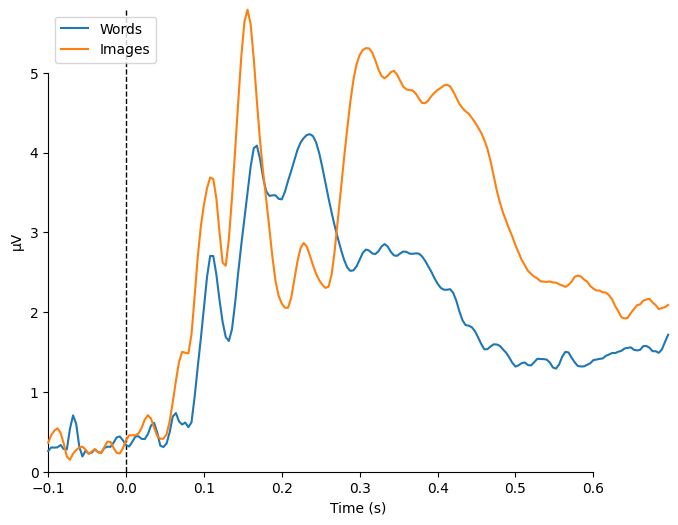

[<Figure size 800x600 with 1 Axes>]

In [18]:
mne.viz.plot_compare_evokeds({
   'Words' : words,
   'Images' : images
})

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


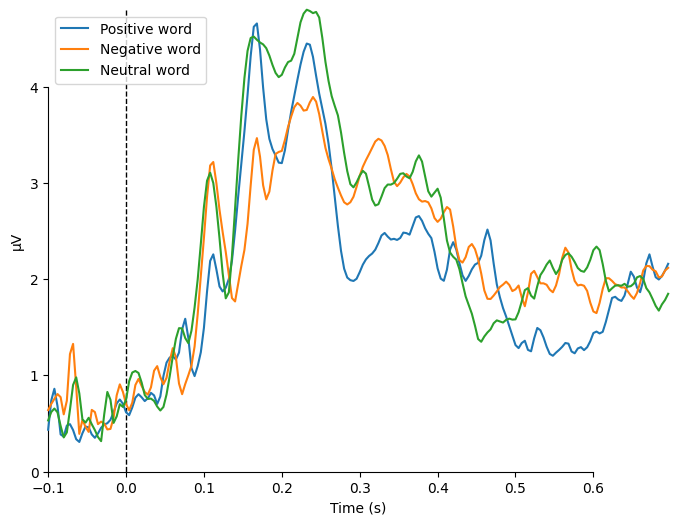

[<Figure size 800x600 with 1 Axes>]

In [19]:
mne.viz.plot_compare_evokeds({
   'Positive word' : word_pos,
   'Negative word' : word_neg,
   'Neutral word' : word_neu
})

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


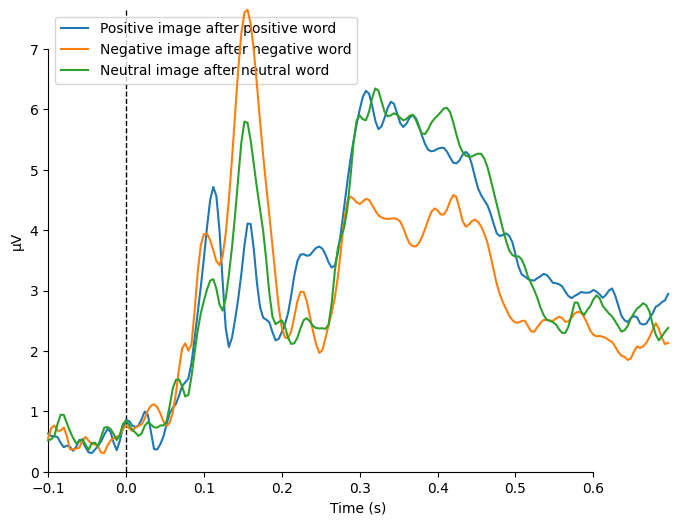

[<Figure size 800x600 with 1 Axes>]

In [20]:
mne.viz.plot_compare_evokeds({
   'Positive image after positive word' : image_pos,
   'Negative image after negative word' : image_neg,
   'Neutral image after neutral word' : image_neu
})

combining channels using "gfp"
combining channels using "gfp"


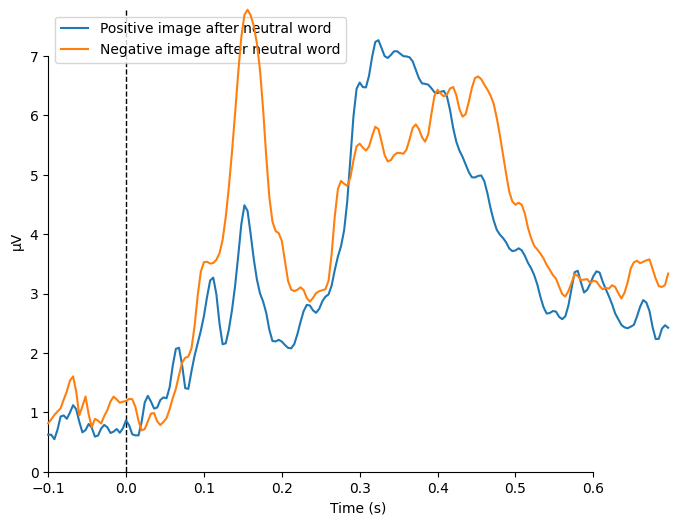

[<Figure size 800x600 with 1 Axes>]

In [21]:
mne.viz.plot_compare_evokeds({
   'Positive image after neutral word' : image_neu_pos,
   'Negative image after neutral word' : image_neu_neg
})

## Response times

In [22]:
# RT code snippet
events_tmp = events.copy() # making a copy of the events structure so we don't fiddle with the original structure
rt = np.zeros([np.shape(events_tmp)[0],2]) # creating an rt-structure with zeros, same length as events and 2 columns
for idx, line in enumerate(events_tmp): # iterating over each line in the events structure
    if any(line[2] == [101,102,111,112]): # picking out only the correct-response lines
        rt[idx] = (line[2],line[0]-events_tmp[idx-1,0]) # subtracting the timestamps of the preceding image from the from that of the response
pure_rt = rt[np.nonzero(rt[:,0]),][0] # creating a structure only with response times (i.e. no "blank" lines for all the other triggers from word, image, etc.)
mean_rt = [(x, np.mean(pure_rt[pure_rt[:,0]==x,1]), 
                    np.std(pure_rt[pure_rt[:,0]==x,1])) 
                   for x in np.unique(pure_rt[:,0])] # calculating the mean and standard deviation of the rt for each unique trigger value in pure_rt (using list comprehension)
[print("{}: {:5.2f} (±{:5.2f}) ms\n".format(list(event_id.keys())[list(event_id.values()).index(i)],
                                            j,k)) for i,j,k in mean_rt] # printing those values (using list comprehension)

image_rt = np.concatenate(([events_tmp[np.nonzero(rt[:,0])[0]-1,2]], [rt[np.nonzero(rt[:,0]),1][0]]), axis=0).T # concatenating image-triggers with the relevant rts
mean_image_rt = [(x, np.mean(image_rt[image_rt[:,0]==x,1]), 
                  np.std(image_rt[image_rt[:,0]==x,1])) 
                 for x in np.unique(image_rt[:,0])] # calculating the mean and standard deviation of the rt for each unique trigger value in image_rt (should be identical to the response-categories
[print("{}: {:5.2f} (±{:5.2f}) ms\n".format(list(event_id.keys())[list(event_id.values()).index(i)],
                                            j,k)) for i,j,k in mean_image_rt] # printing those values

Correct/wPos: 884.00 (± 0.00) ms

Correct/wNeg: 468.23 (±79.89) ms

Correct/wNeu/iPos: 437.97 (±69.49) ms

Correct/wNeu/iNeg: 492.88 (±76.20) ms

Image/wPos: 884.00 (± 0.00) ms

Image/wNeg: 468.23 (±79.89) ms

Image/wNeu/iPos: 437.97 (±69.49) ms

Image/wNeu/iNeg: 492.88 (±76.20) ms



[None, None, None, None]

## Writing to files

In [27]:
epochs.save('Data/epochs_group5.fif')

C:\Users\dolse\AppData\Local\Temp\ipykernel_9324\164944541.py:1: RuntimeWarning: This filename (Data/epochs_group5.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save('Data/epochs_group5.fif')


In [42]:
for evoked, name in zip([words, images, word_pos, word_neg, word_neu, image_pos, image_neg, image_neu, image_neu_pos, image_neu_neg],['words', 'images', 'word_pos', 'word_neg', 'word_neu', 'image_pos', 'image_neg', 'image_neu', 'image_neu_pos', 'image_neu_neg']):
    evoked.save(f'Data/{name}_group5.fif')

C:\Users\dolse\AppData\Local\Temp\ipykernel_9324\326266190.py:2: RuntimeWarning: This filename (c:\Users\dolse\Python\Scripts\EEG analysis\Data\words_group5.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(f'Data/{name}_group5.fif')
C:\Users\dolse\AppData\Local\Temp\ipykernel_9324\326266190.py:2: RuntimeWarning: This filename (c:\Users\dolse\Python\Scripts\EEG analysis\Data\images_group5.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(f'Data/{name}_group5.fif')
C:\Users\dolse\AppData\Local\Temp\ipykernel_9324\326266190.py:2: RuntimeWarning: This filename (c:\Users\dolse\Python\Scripts\EEG analysis\Data\word_pos_group5.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save(f'Data/{name}_group5.fif')
C:\Users\dolse\

## Reporting

### Exercise 1

Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated


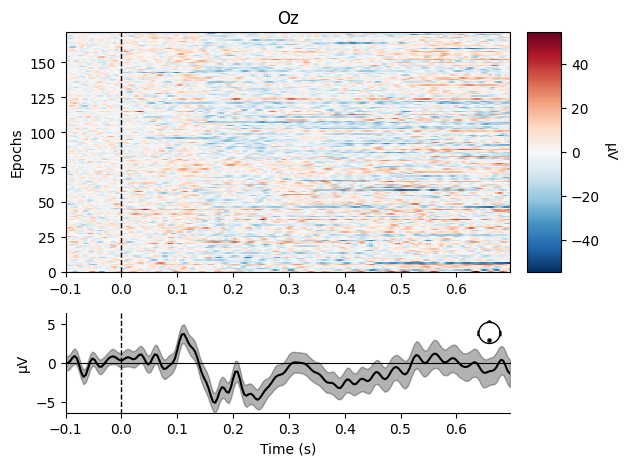

Not setting metadata
179 matching events found
No baseline correction applied
0 projection items activated


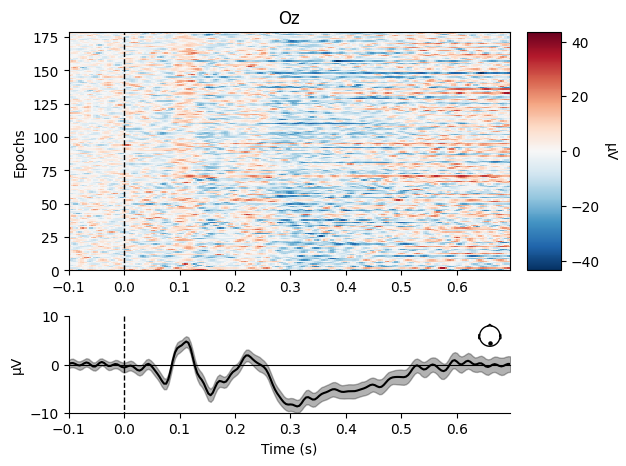

In [50]:
epochs[word_list].plot_image(picks=['Oz']);
epochs[image_list].plot_image(picks=['Oz']);

### Exercise 2

No projector specified for this dataset. Please consider the method self.add_proj.


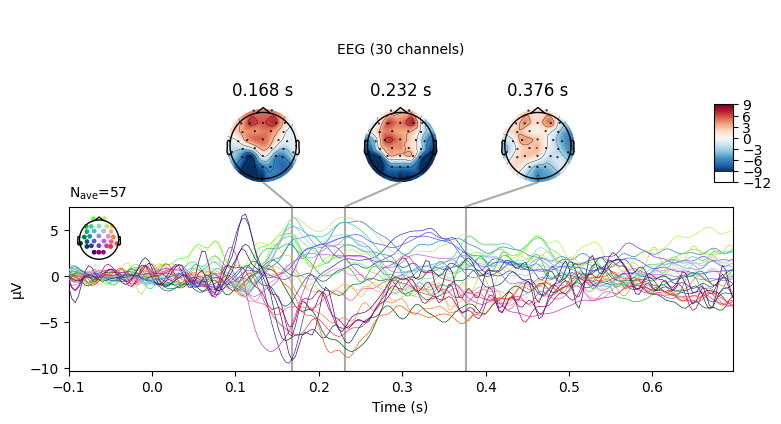

No projector specified for this dataset. Please consider the method self.add_proj.


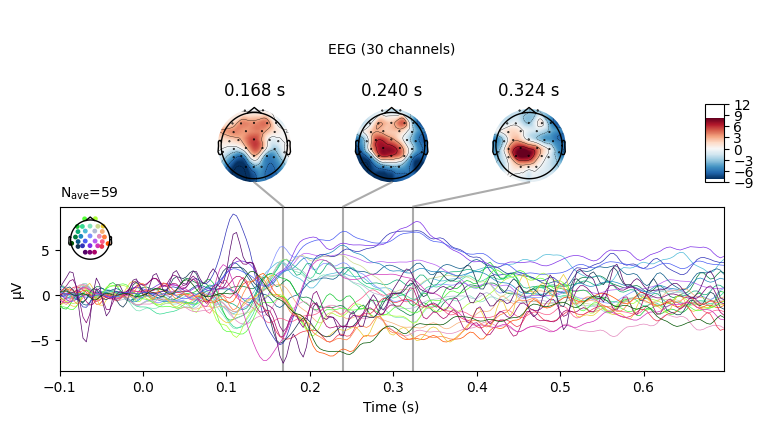

No projector specified for this dataset. Please consider the method self.add_proj.


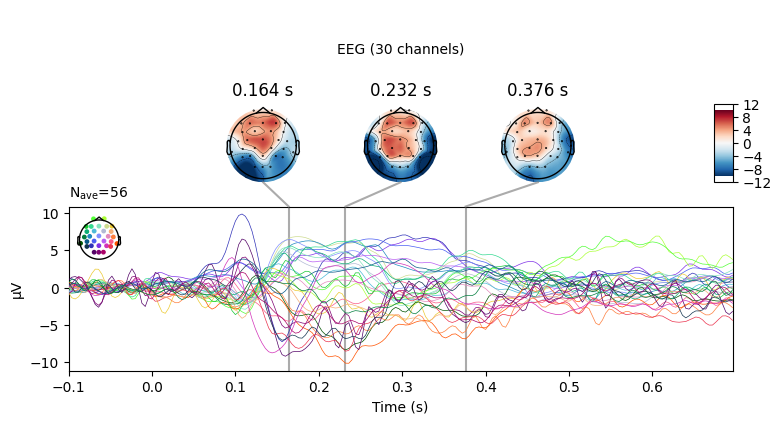

In [ ]:
word_pos.plot_joint();
word_neg.plot_joint();
word_neu.plot_joint();

### Exercise 3

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


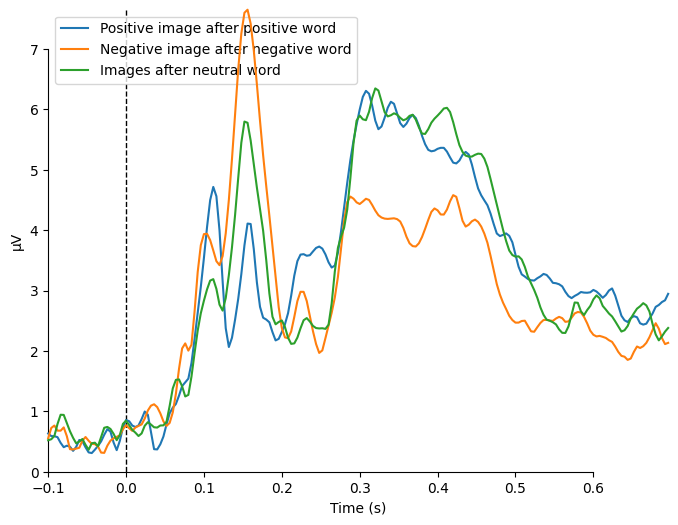

[<Figure size 800x600 with 1 Axes>]

In [55]:
mne.viz.plot_compare_evokeds({
   'Positive image after positive word' : image_pos,
   'Negative image after negative word' : image_neg,
   'Images after neutral word' : image_neu
})

combining channels using "gfp"
combining channels using "gfp"


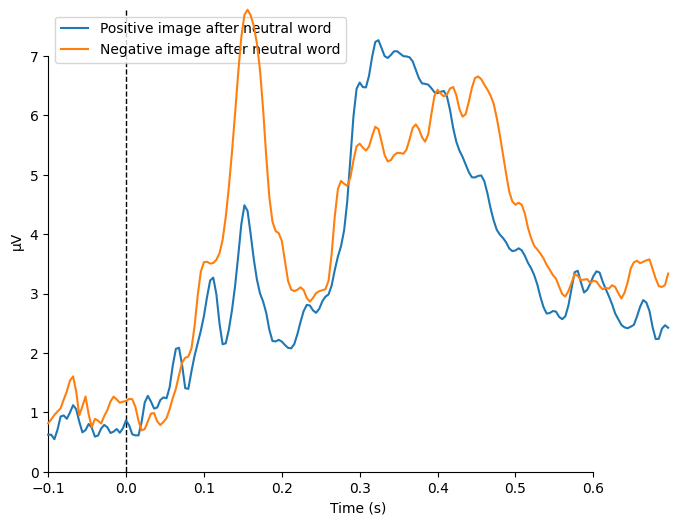

[<Figure size 800x600 with 1 Axes>]

In [56]:
mne.viz.plot_compare_evokeds({
   'Positive image after neutral word' : image_neu_pos,
   'Negative image after neutral word' : image_neu_neg
})